### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [6]:
# 1. Load and Inspect the CMAPSS Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define column names
column_names = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1,22)]

# Load the dataset
# Adjust the path if needed
file_path = '../../data/train_FD001.txt'
df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)

# Display DataFrame shape, info, and first 5 rows
print("Shape:", df.shape)
df.info()
display(df.head())

Shape: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

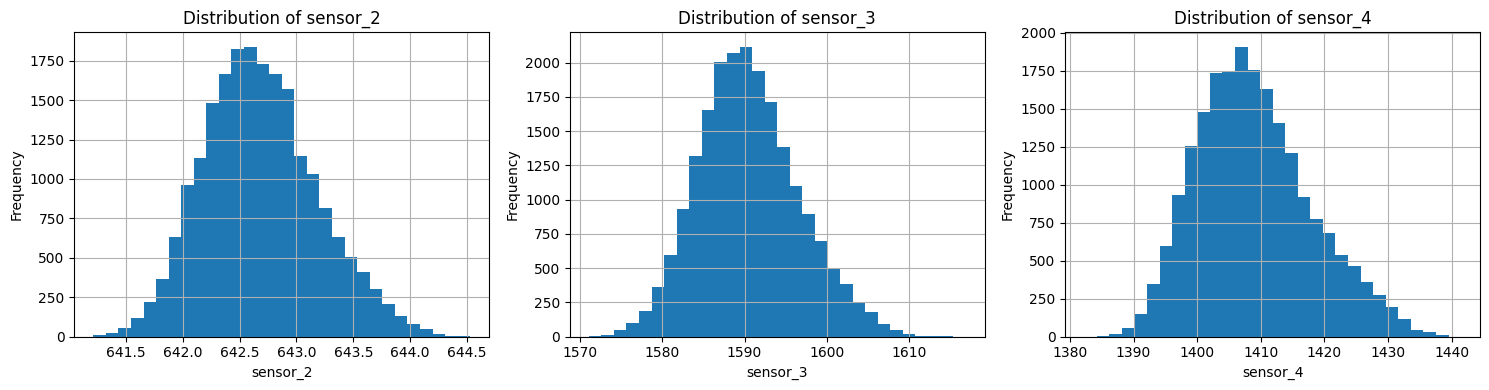

Missing values per column:
 engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


In [2]:
# 2. Visualize Sensor Distributions and Identify Missing Values
# Select three sensor columns to visualize
sensor_cols = ["sensor_2", "sensor_3", "sensor_4"]

plt.figure(figsize=(15, 4))
for i, col in enumerate(sensor_cols):
    plt.subplot(1, 3, i+1)
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Check for missing values in all columns
missing_report = df.isnull().sum()
print("Missing values per column:\n", missing_report)

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [3]:
# 3. Feature Engineering – Aggregation and Rolling Statistics
# Compute mean and std of sensor_2 by engine_id
sensor = "sensor_2"
engine_means = df.groupby("engine_id")[sensor].transform("mean")
engine_stds = df.groupby("engine_id")[sensor].transform("std")
df[f"{sensor}_mean_by_engine"] = engine_means
df[f"{sensor}_std_by_engine"] = engine_stds

# Compute rolling mean (window=5) for each engine's sensor_2
rolling_means = df.groupby("engine_id")[sensor].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df[f"{sensor}_rolling_mean_5"] = rolling_means

# Show a few sample rows
print(df[["engine_id", "cycle", sensor, f"{sensor}_mean_by_engine", f"{sensor}_std_by_engine", f"{sensor}_rolling_mean_5"]].head(10))

   engine_id  cycle  sensor_2  sensor_2_mean_by_engine  \
0          1      1    641.82               642.621042   
1          1      2    642.15               642.621042   
2          1      3    642.35               642.621042   
3          1      4    642.35               642.621042   
4          1      5    642.37               642.621042   
5          1      6    642.10               642.621042   
6          1      7    642.48               642.621042   
7          1      8    642.56               642.621042   
8          1      9    642.12               642.621042   
9          1     10    641.71               642.621042   

   sensor_2_std_by_engine  sensor_2_rolling_mean_5  
0                0.486795               641.820000  
1                0.486795               641.985000  
2                0.486795               642.106667  
3                0.486795               642.167500  
4                0.486795               642.208000  
5                0.486795               642

#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [4]:
# 4. Data Normalization
from sklearn.preprocessing import StandardScaler

# Identify sensor columns
sensor_cols = [col for col in df.columns if col.startswith("sensor_")]

scaler = StandardScaler()
normalized_sensors = scaler.fit_transform(df[sensor_cols])

# Create new DataFrame with normalized values
normalized_df = pd.DataFrame(normalized_sensors, columns=sensor_cols)
normalized_df["engine_id"] = df["engine_id"].values
normalized_df["cycle"] = df["cycle"].values

# Show head and check means/stds
print(normalized_df.head())
print("Means (should be ~0):\n", normalized_df[sensor_cols].mean())
print("Stds (should be ~1):\n", normalized_df[sensor_cols].std())

   sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  sensor_6  sensor_7  \
0       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15  0.141683  1.121141   
1       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15  0.141683  0.431930   
2       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15  0.141683  1.008155   
3       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15  0.141683  1.222827   
4       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15  0.141683  0.714393   

   sensor_8  sensor_9  sensor_10  ...  sensor_17  sensor_18  sensor_19  \
0 -0.516338 -0.862813        0.0  ...  -0.781710        0.0        0.0   
1 -0.798093 -0.958818        0.0  ...  -0.781710        0.0        0.0   
2 -0.234584 -0.557139        0.0  ...  -2.073094        0.0        0.0   
3  0.188048 -0.713826        0.0  ...  -0.781710        0.0        0.0   
4 -0.516338 -0.457059        0.0  ...  -0.136018        0.0        0.0   

   sensor_20  sensor_21  sensor_2_mean_by_engine  sensor_2_std_by_engine  \
0   

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [5]:
# 5. Rolling Window Sequence Generation
import numpy as np

window_size = 30
features = [col for col in df.columns if col.startswith("sensor_")]

sequences = []
engine_ids = []
cycles = []

for engine_id, group in df.groupby("engine_id"):
    group = group.sort_values("cycle")
    for i in range(len(group) - window_size + 1):
        window = group.iloc[i:i+window_size][features].values
        sequences.append(window)
        engine_ids.append(engine_id)
        cycles.append(group.iloc[i+window_size-1]["cycle"])

sequences = np.array(sequences)

# Save arrays and lists
np.save("sequences.npy", sequences)
pd.DataFrame({"engine_id": engine_ids, "cycle": cycles}).to_csv("sequence_ids.csv", index=False)

print("Shape of sequence array:", sequences.shape)
print("First sequence example:\n", sequences[0])
print("Files saved: sequences.npy, sequence_ids.csv")

Shape of sequence array: (17731, 30, 24)
First sequence example:
 [[5.18670000e+02 6.41820000e+02 1.58970000e+03 1.40060000e+03
  1.46200000e+01 2.16100000e+01 5.54360000e+02 2.38806000e+03
  9.04619000e+03 1.30000000e+00 4.74700000e+01 5.21660000e+02
  2.38802000e+03 8.13862000e+03 8.41950000e+00 3.00000000e-02
  3.92000000e+02 2.38800000e+03 1.00000000e+02 3.90600000e+01
  2.34190000e+01 6.42621042e+02 4.86795224e-01 6.41820000e+02]
 [5.18670000e+02 6.42150000e+02 1.59182000e+03 1.40314000e+03
  1.46200000e+01 2.16100000e+01 5.53750000e+02 2.38804000e+03
  9.04407000e+03 1.30000000e+00 4.74900000e+01 5.22280000e+02
  2.38807000e+03 8.13149000e+03 8.43180000e+00 3.00000000e-02
  3.92000000e+02 2.38800000e+03 1.00000000e+02 3.90000000e+01
  2.34236000e+01 6.42621042e+02 4.86795224e-01 6.41985000e+02]
 [5.18670000e+02 6.42350000e+02 1.58799000e+03 1.40420000e+03
  1.46200000e+01 2.16100000e+01 5.54260000e+02 2.38808000e+03
  9.05294000e+03 1.30000000e+00 4.72700000e+01 5.22420000e+02
  